In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns

In [2]:
data=pd.read_json('/content/bloomberg.json')

In [3]:
df=data.copy()

In [4]:
df.head()

,Locs,Lastmod,Changefreq,Priority,URL
0,https://www.bloomberg.com/news/articles/2010-0...,2010-01-25T23:01:01.000Z,yearly,0.1,https://www.bloomberg.com/feeds/bbiz/sitemap_2...
1,https://www.bloomberg.com/news/articles/2010-0...,2010-01-06T21:26:18.000Z,yearly,0.1,https://www.bloomberg.com/feeds/bbiz/sitemap_2...
2,https://www.bloomberg.com/news/articles/2010-0...,2010-01-04T09:37:31.000Z,yearly,0.1,https://www.bloomberg.com/feeds/bbiz/sitemap_2...
3,https://www.bloomberg.com/news/articles/2010-0...,2010-01-04T13:01:41.001Z,yearly,0.1,https://www.bloomberg.com/feeds/bbiz/sitemap_2...
4,https://www.bloomberg.com/news/articles/2010-0...,2010-01-04T13:51:39.000Z,yearly,0.1,https://www.bloomberg.com/feeds/bbiz/sitemap_2...


In [5]:
pd.set_option('display.max_colwidth', None)

In [6]:
pattern = r'(\d{4}-\d{2}-\d{2})/(.*)'

extract_data = lambda url: {'Date': re.findall(pattern, url)[0][0] if re.findall(pattern, url) else np.NaN, 
                            'News_name': re.findall(pattern, url)[0][1].replace('-', ' ') 
                                         if re.findall(pattern, url) else np.NaN}

df_news = pd.DataFrame(df['Locs'].apply(extract_data).tolist())

In [7]:
df_news.head()

,Date,News_name
0,2010-01-25,davos too big to fail as bankers recoil in political backlash
1,2010-01-06,wall street hubris soars as crisis goes to waste
2,2010-01-04,novartis to buy out alcon from nestle
3,2010-01-04,kraft may lift offer on cadbury stock rise
4,2010-01-04,india autos toyota honda challenge suzuki


In [8]:
df_news.shape

(58305, 2)

In [9]:
df_news.dropna(inplace=True)

In [10]:
df_news['Date']=pd.to_datetime(df_news['Date'])

In [11]:
df_news=df_news.loc[(df_news['Date'] >= '2015-01-01') & (df_news['Date'] <= '2020-12-31')]

In [12]:
df_news.reset_index(inplace=True)

In [13]:
#df_news=df_news.iloc[:,1:]

In [14]:
gold=pd.read_csv("/content/Gold Futures Historical Data.csv")

In [15]:
gold['Change']=(gold['Price'].str.replace(',', '').astype(float) - 
                gold['Open'].str.replace(',', '').astype(float))/gold['Open'].str.replace(',', '').astype(float)

In [16]:
thresholds = np.percentile(gold['Change'], [100/3, 200/3])

In [17]:
gold['position'] = gold['Change'].apply(lambda x: 'short' if x < thresholds[0] else 
                                        'hold' if x < thresholds[1] else 'long')

In [18]:
gold['position'].value_counts(normalize = True)

short    0.33343
long     0.33343
hold     0.33314
Name: position, dtype: float64

In [19]:
def find_position(x, thresholds):
  if x < thresholds[0]:
    return('short')
  elif x < thresholds[1]:
    return('hold')
  else:
    return('long')

In [20]:
gold['position'] = gold['Change'].apply(lambda x: find_position(x, thresholds))

In [21]:
gold['position'].value_counts(normalize = True)

short    0.33343
long     0.33343
hold     0.33314
Name: position, dtype: float64

In [22]:
gold['Date']=pd.to_datetime(gold['Date'])

<Axes: xlabel='Change', ylabel='Count'>

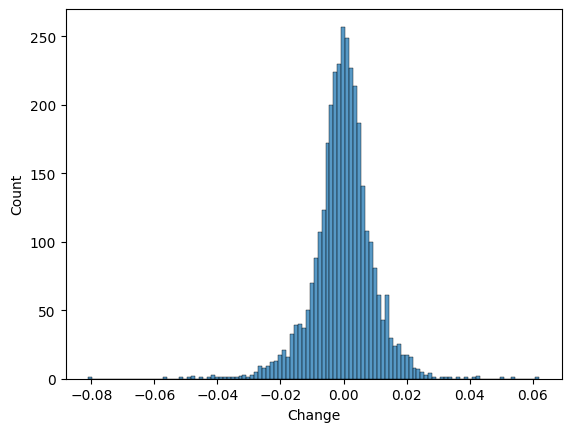

In [23]:
import seaborn as sns
sns.histplot(gold['Change'])

In [24]:
gold['Date']=pd.to_datetime(gold['Date'])

In [25]:
df_news.sort_values('Date')

,index,Date,News_name
0,27490,2015-01-02,white castle introduces veggie sliders
1,27491,2015-01-02,why you should care about greece again
2,27492,2015-01-02,ces 2015 this years tech anxiety is ending up like tv makers
3,27493,2015-01-02,french economist thomas piketty faces trial by peers i4g1wes7
4,27494,2015-01-02,kanye wests only one isnt very good but it is selling i4g546uv
...,...,...,...
6447,40223,2020-12-29,oprah trudeau and covid we charity innovated its way to political scandal
6449,40225,2020-12-29,wrong way bet on covid is changing oil trading industry forever
6450,40226,2020-12-29,the sanity list what s been getting us through the pandemic
6448,40224,2020-12-29,fried chicken blts and mackerel 11 memorable meals from 2020


In [26]:
gold.Date = pd.to_datetime(gold.Date)

In [27]:
news_data=list(map(lambda x:
 [df_news[df_news['Date'].between(x[0]-pd.DateOffset(days=3),x[0]-pd.DateOffset(days=1))]['News_name'].tolist(),
                             x[0],x[-1]],np.array(gold).tolist()))

In [28]:
set(map(lambda x: type(x[0]), news_data))

{list}

In [29]:
news = list(map(lambda x: x[0][-20:] if len(x[0]) > 20 else x, news_data))

In [30]:
max(map(lambda x: len(x[0]), news))

70

In [31]:
set(map(lambda x: type(x[0]), news))

{list, str}

In [32]:
news = list(map(lambda x: list(x[0]) if type(x[0]) == str else x, news))

In [33]:
max(list(map(lambda x: len(x[0]), news)))

20

In [34]:
news2 = list(filter(lambda x: len(x[0]) > 3, news))

In [35]:
min(list(map(lambda x: len(x[0]), news2)))

4

In [36]:
news2

[[['the doctor will see you once you sign this binding arbitration agreement',
   'oprah trudeau and covid we charity innovated its way to political scandal',
   'fried chicken blts and mackerel 11 memorable meals from 2020',
   'wrong way bet on covid is changing oil trading industry forever',
   'the sanity list what s been getting us through the pandemic',
   '2021 calendar quicktake s guide to the year s biggest global news'],
  Timestamp('2020-12-31 00:00:00'),
  'hold'],
 [['the doctor will see you once you sign this binding arbitration agreement',
   'oprah trudeau and covid we charity innovated its way to political scandal',
   'fried chicken blts and mackerel 11 memorable meals from 2020',
   'wrong way bet on covid is changing oil trading industry forever',
   'the sanity list what s been getting us through the pandemic'],
  Timestamp('2020-12-30 00:00:00'),
  'long'],
 [['there s no trade off between lives and the economy',
   'the environmental social and governance esg mov

In [37]:
pip install -U sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 68.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 70.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 24.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 90.5 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125926 sha256=5725d257ddaae472d57d24a751e3325f01fb3e4c562bdc59278c900aaa2d8215
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence-transformers


In [38]:
from sentence_transformers import SentenceTransformer

In [39]:
model = SentenceTransformer('sentence-transformers/all-MiniLM-L12-v2')

In [40]:
sentences=[x[0] for x in news2]

In [41]:
embedding = list(map(lambda sentence: model.encode(sentence), sentences))

In [42]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [43]:
embedding

[array([[-0.07374257,  0.02661959,  0.04573363, ..., -0.02664945,
          0.00717274, -0.01191373],
        [ 0.02751287,  0.04024733, -0.01317275, ..., -0.01596818,
          0.10264608, -0.0406168 ],
        [-0.01002457,  0.01842713, -0.01293259, ...,  0.02407558,
         -0.08099493,  0.0183985 ],
        [-0.00802074,  0.01893818, -0.04218107, ..., -0.03490452,
         -0.01588102, -0.02877541],
        [ 0.0119498 , -0.07500866, -0.03133788, ...,  0.05050705,
         -0.03404925,  0.03491108],
        [-0.03112239, -0.02333967, -0.02565299, ..., -0.02059157,
         -0.0201065 ,  0.06476774]], dtype=float32),
 array([[-0.07374257,  0.02661959,  0.04573363, ..., -0.02664945,
          0.00717274, -0.01191373],
        [ 0.02751287,  0.04024733, -0.01317275, ..., -0.01596818,
          0.10264608, -0.0406168 ],
        [-0.01002457,  0.01842713, -0.01293259, ...,  0.02407558,
         -0.08099493,  0.0183985 ],
        [-0.00802074,  0.01893818, -0.04218107, ..., -0.03490452,

In [44]:
X=list(map(lambda x:
           np.pad(x,[(max_dim - original_dim, 0) for max_dim, original_dim in zip((20,384), x.shape)],
                  mode='constant', 
                  constant_values=0) ,
           embedding))

In [45]:
X=np.array(X)

In [46]:
len(embedding)

956

In [47]:
y=[x[-1] for x in news2]

In [48]:
len(y)

956

In [49]:
size=int(len(embedding)*0.8)

In [50]:
X_train=X[:size]

In [51]:
X_train.shape

(764, 20, 384)

In [52]:
X_test=X[size:]

In [53]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)

In [54]:
y_train=y[:size]
y_test=y[size:]

In [55]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Masking

In [71]:
classifier = Sequential()
classifier.add(Masking(mask_value=0., input_shape=(20, 384)))
classifier.add(LSTM(128,activation='relu',return_sequences=True))
classifier.add(Dropout(0.2))
classifier.add(LSTM(64,activation='relu'))
classifier.add(Dropout(0.2))
classifier.add(Dense(3,activation='softmax'))
classifier.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [72]:
from keras.callbacks import ModelCheckpoint

In [73]:
filepath = '/content/my_best_model.hdf5'

In [74]:
checkpoint = ModelCheckpoint(filepath=filepath, 
                             monitor='val_loss',
                             verbose=1, 
                             save_best_only=True,
                             mode='min')

In [75]:
classifier.fit(X_train, y_train, epochs = 100, validation_split=0.4,callbacks=checkpoint)

Epoch 1/100
14/15 [===========================>..] - ETA: 0s - loss: 1.0965 - accuracy: 0.3616
Epoch 1: val_loss improved from inf to 1.11141, saving model to /content/my_best_model.hdf5
15/15 [==============================] - 9s 123ms/step - loss: 1.0957 - accuracy: 0.3624 - val_loss: 1.1114 - val_accuracy: 0.2680
Epoch 2/100
15/15 [==============================] - ETA: 0s - loss: 1.0857 - accuracy: 0.3581
Epoch 2: val_loss did not improve from 1.11141
15/15 [==============================] - 1s 89ms/step - loss: 1.0857 - accuracy: 0.3581 - val_loss: 1.1230 - val_accuracy: 0.2680
Epoch 3/100
14/15 [===========================>..] - ETA: 0s - loss: 1.0688 - accuracy: 0.4040
Epoch 3: val_loss improved from 1.11141 to 1.09029, saving model to /content/my_best_model.hdf5
15/15 [==============================] - 1s 95ms/step - loss: 1.0697 - accuracy: 0.4039 - val_loss: 1.0903 - val_accuracy: 0.4183
Epoch 4/100
14/15 [===========================>..] - ETA: 0s - loss: 1.0497 - accuracy: 0

In [76]:
model = keras.models.load_model(filepath)

In [95]:
classifier.evaluate(X_test,y_test)

6/6 [==============================] - 0s 28ms/step - loss: 8.9153 - accuracy: 0.3438


[8.91525936126709, 0.34375]

In [96]:
pred = classifier.predict(X_test)

6/6 [==============================] - 0s 43ms/step


In [97]:
pred_train = classifier.predict(X_train)

24/24 [==============================] - 1s 51ms/step


In [98]:
pred_train

array([[6.6485959e-01, 3.3374727e-01, 1.3932845e-03],
       [5.2365762e-01, 4.6901333e-01, 7.3291459e-03],
       [3.3262206e-04, 9.9966550e-01, 1.9519166e-06],
       ...,
       [6.7059749e-01, 3.2849896e-01, 9.0355298e-04],
       [5.5726442e-02, 1.1657800e-01, 8.2769561e-01],
       [2.1536970e-01, 2.4228376e-01, 5.4234660e-01]], dtype=float32)

In [99]:
from sklearn.metrics import confusion_matrix

In [100]:
cf_matrix = confusion_matrix(y_test, pred.argmax(axis = 1),labels = [0,1,2])
cf_matrix

array([[19, 17, 18],
       [23, 20, 19],
       [25, 24, 27]])

<Axes: >

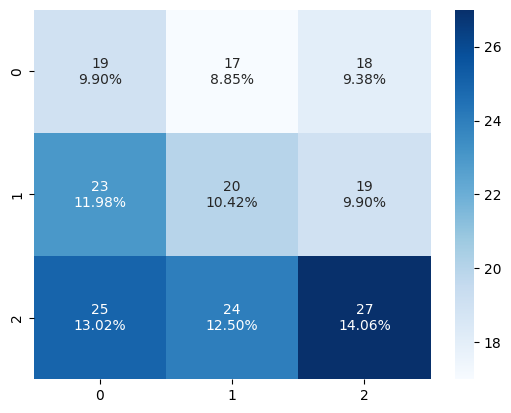

In [103]:
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}' for v1, v2 in
          zip(group_counts,group_percentages)]
labels = np.asarray(labels).reshape(3,3)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
print("Accuracy",accuracy_score(y_test,pred.argmax(axis = 1)))

In [ ]:
print("Classificatiobn_report",classification_report(y_test,pred.argmax(axis = 1)))